In [43]:
import pandas as pd
import numpy as np

In [44]:
df= pd.read_csv("parts.csv", encoding='cp1252')
df

,part_name,part_number,process,material,parttype,rfq_tolerance,partsize,width,height,depth,length,diameter
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,Alloy Steel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,Aluminum,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,3D Printing / FDM,ABS-Like,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3D Printing / FDM,Thermoplastic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
86593,??,1.49147E+12,Woodworking,Wood,NaN,NaN,NaN,0.0000,0.000,0.0,0.0,0.0
86594,??,1.49147E+12,Woodworking,Wood,NaN,NaN,NaN,0.0000,0.000,0.0,0.0,0.0
86595,????????,1.47997E+12,Contact an Engineer,NaN,NaN,NaN,NaN,0.0000,0.000,0.0,0.0,0.0
86596,????,1.46777E+12,Injection Molding,Thermoplastic,prismatic,NaN,small,52.7366,132.484,25.0,0.0,0.0


In [45]:
df=df.iloc[:,2:7]
df

,process,material,parttype,rfq_tolerance,partsize
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Alloy Steel,NaN,NaN,NaN
2,NaN,Aluminum,NaN,NaN,NaN
3,3D Printing / FDM,ABS-Like,NaN,NaN,NaN
4,3D Printing / FDM,Thermoplastic,NaN,NaN,NaN
...,...,...,...,...,...
86593,Woodworking,Wood,NaN,NaN,NaN
86594,Woodworking,Wood,NaN,NaN,NaN
86595,Contact an Engineer,NaN,NaN,NaN,NaN
86596,Injection Molding,Thermoplastic,prismatic,NaN,small


In [46]:
df.describe()

,process,material,parttype,rfq_tolerance,partsize
count,76426,74283,67567,29263,69909
unique,260,38,2,3,2
top,Machining / Milling & Turning,Aluminum,prismatic,Medium,small
freq,22582,21934,40163,13834,50502


In [47]:

df=df.head(50000)

In [48]:
df.isna().sum()

process           5897
material          7160
parttype         10820
rfq_tolerance    33473
partsize          9439
dtype: int64

In [49]:
reg=r'[_!@#$%^&*"-\/]'
df.replace(reg, '', regex=True, inplace=True)

C:\Users\i\AppData\Local\Temp\ipykernel_17040\2705865781.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace(reg, '', regex=True, inplace=True)


In [50]:
df

,process,material,parttype,rfq_tolerance,partsize
0,NaN,NaN,NaN,NaN,NaN
1,NaN,Alloy Steel,NaN,NaN,NaN
2,NaN,Aluminum,NaN,NaN,NaN
3,3D Printing FDM,ABSLike,NaN,NaN,NaN
4,3D Printing FDM,Thermoplastic,NaN,NaN,NaN
...,...,...,...,...,...
49995,NaN,NaN,prismatic,Medium,small
49996,Machining EDM,Carbon Steel,prismatic,Medium,small
49997,NaN,NaN,prismatic,Medium,small
49998,Contact an Engineer,Inconel,NaN,NaN,NaN


In [51]:
df.fillna('',inplace=True)

C:\Users\i\AppData\Local\Temp\ipykernel_17040\3094999256.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna('',inplace=True)


In [52]:
df.describe()

,process,material,parttype,rfq_tolerance,partsize
count,50000,50000,50000,50000,50000
unique,205,39,3,4,3
top,Machining Milling Turning,Aluminum,prismatic,,small
freq,13228,12992,23842,33473,29237


In [53]:
encoded_process= pd.get_dummies(df['process'], prefix='process')
encoded_material= pd.get_dummies(df['material'], prefix='material')
encoded_parttype= pd.get_dummies(df['parttype'], prefix='parttype')
encoded_rfq_tolerance= pd.get_dummies(df['rfq_tolerance'], prefix='rfq_tolerance')
encoded_partsize= pd.get_dummies(df['partsize'], prefix='partsize')



In [54]:
encoded_rfq_tolerance.shape

(50000, 4)

In [55]:
df_encoded = pd.concat([df, encoded_process, encoded_material, encoded_parttype, encoded_rfq_tolerance, encoded_partsize], axis=1)

In [56]:
df_encoded

,process,material,parttype,rfq_tolerance,partsize,process_,process_3D Printing DMLS,process_3D Printing FDM,process_3D Printing MJF,process_3D Printing Other 3D Printing,...,parttype_,parttype_cylindrical,parttype_prismatic,rfq_tolerance_,rfq_tolerance_Loose,rfq_tolerance_Medium,rfq_tolerance_Tight,partsize_,partsize_large,partsize_small
0,,,,,,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,,Alloy Steel,,,,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
2,,Aluminum,,,,True,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,3D Printing FDM,ABSLike,,,,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
4,3D Printing FDM,Thermoplastic,,,,False,False,True,False,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,,,prismatic,Medium,small,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49996,Machining EDM,Carbon Steel,prismatic,Medium,small,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49997,,,prismatic,Medium,small,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49998,Contact an Engineer,Inconel,,,,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [39]:
import spacy

In [ ]:
nlp= spacy.load('en_core_web_md')

In [ ]:
for i in range(2000):
    df.combined[i]=nlp(df.combined[i])

In [ ]:
df.combined

In [ ]:
for token in df.combined[50]:
    print(token.vector)
    print(token.vector.shape)

In [ ]:
df['vector']=df['combined'].apply(lambda x: x.vector)

In [ ]:
df.vector.values

In [57]:
X=df_encoded.drop(columns=['process','material','parttype', 'rfq_tolerance', 'partsize'])
    

In [58]:
X

,process_,process_3D Printing DMLS,process_3D Printing FDM,process_3D Printing MJF,process_3D Printing Other 3D Printing,process_3D Printing SLA,process_3D Printing SLS,process_Accessories Other Accessories,process_Apparel Other Apparel,process_Assembly Cable Wire Rope,...,parttype_,parttype_cylindrical,parttype_prismatic,rfq_tolerance_,rfq_tolerance_Loose,rfq_tolerance_Medium,rfq_tolerance_Tight,partsize_,partsize_large,partsize_small
0,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
2,True,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49996,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49997,True,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
49998,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,True,False,False


In [59]:
from sklearn.cluster import KMeans

c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

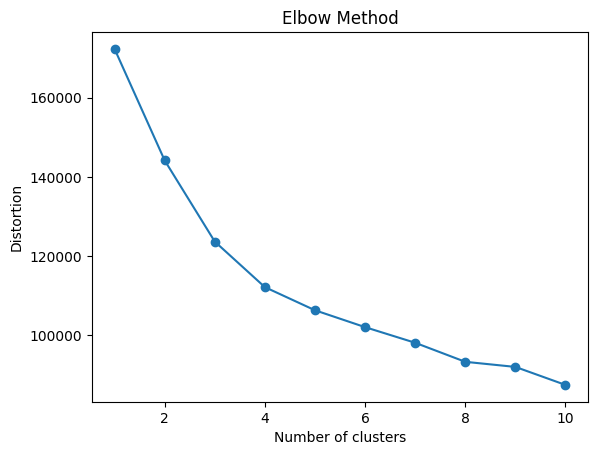

In [89]:
distortions = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow
plt.plot(K_range, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

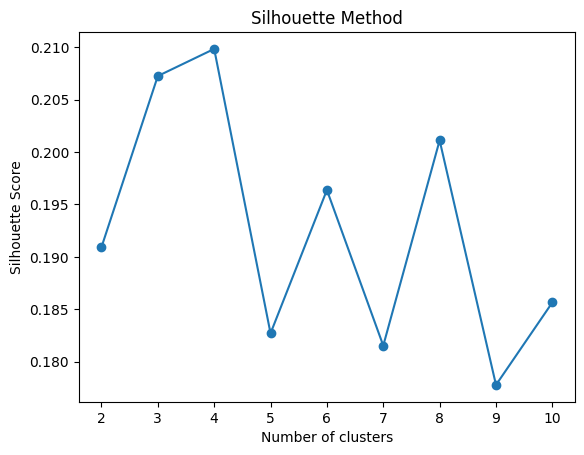

In [60]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

In [82]:
model=KMeans(n_clusters=4)

In [83]:
model.fit(X)

c:\Users\i\Desktop\Project\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [84]:
model.labels_

array([2, 2, 2, ..., 3, 2, 3])

In [85]:
df_encoded['labels']=model.labels_

In [86]:
import matplotlib.pyplot as plt

In [87]:
from sklearn.decomposition import PCA


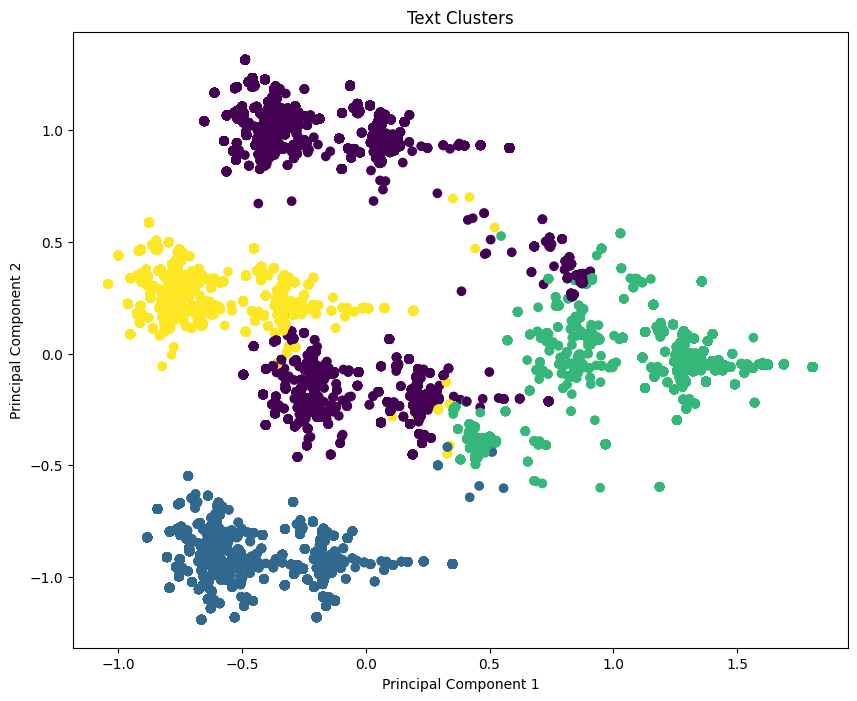

In [88]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Increase the size of the scatter plot
plt.figure(figsize=(10, 8))  # Adjust width and height as needed

# Scatter plot
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_encoded.labels, cmap='viridis')
plt.title('Text Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
df.to_csv("result.csv",index=False)